In [ ]:
## Kütüphanelerin dahil edilmesi...
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings('ignore')

In [ ]:
## veri eğitilmek ve test edilmek üzere bölündü.
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
print("Eğitim seti boyutu :",x_train.shape,y_train.shape)

Eğitim seti boyutu : (60000, 28, 28) (60000,)


In [ ]:
print("Test seti boyutu :",x_test.shape,y_test.shape)

Test seti boyutu : (10000, 28, 28) (10000,)


In [ ]:
## y_train'de bulunan farklı sınıfların sayısı --> (10 adet farklı sınıf var --> (0,1,2,3,4,5,6,7,8,9))
num_labels = len(np.unique(y_train))

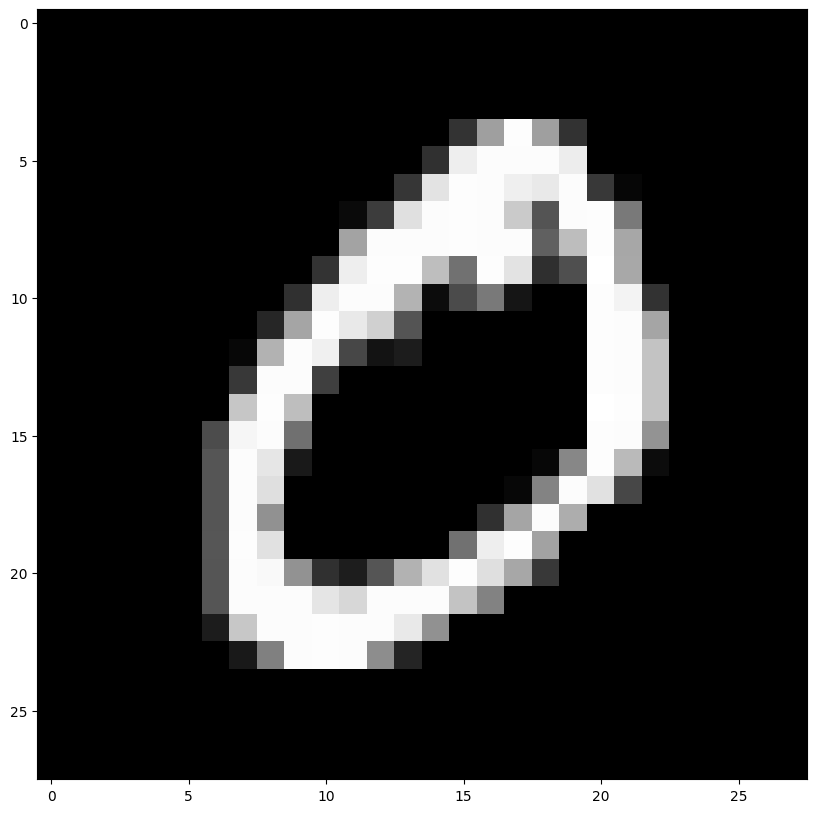

In [ ]:
# veri setindeki ögeleri görmek için imshow kullandık.
plt.figure(figsize=(10,10))
plt.imshow(x_train[1],cmap = "gray")

In [ ]:
## 10 tane veri getiren fonksiyon yazdık.
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n],cmap="gray")
    plt.axis('off')

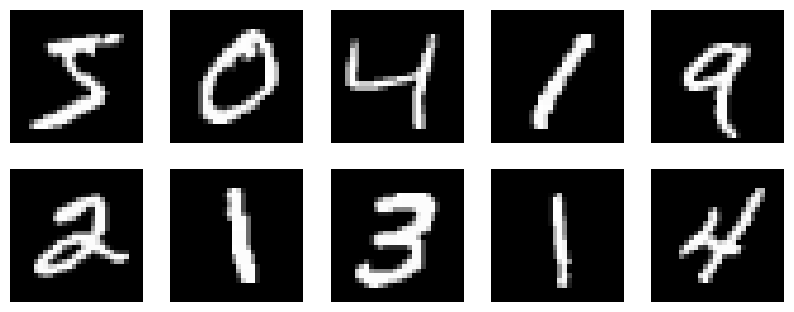

In [ ]:
visualize_img(x_train)

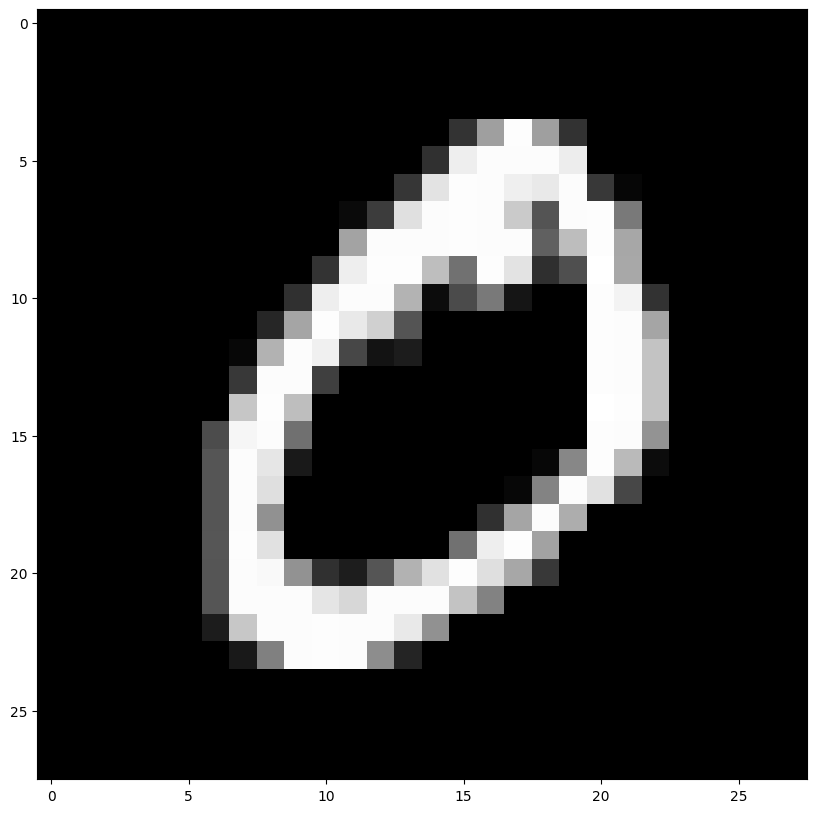

In [ ]:
## x_train veri setinden bir veri seçtik
plt.figure(figsize=(10,10))
plt.imshow(x_train[1],cmap = "gray")

In [ ]:
x_train[1].shape

(28, 28)

In [ ]:
# 10x10 da bulunan pikselin RGB karşılığına baktık.
x_train[1][10,10]

238

In [ ]:
## 2.indexte bulunan verinin RGB piksel değerlerinin ortalamasına baktık.
x_train[2].mean()

24.799744897959183

In [ ]:
## Bu fonksiyon ile her bir pikselin RGB değerlerini veri üzerinde göstermiş olduk.

def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')
  width,height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

      ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                  color='white' if img[x][y] < threshold else 'black')

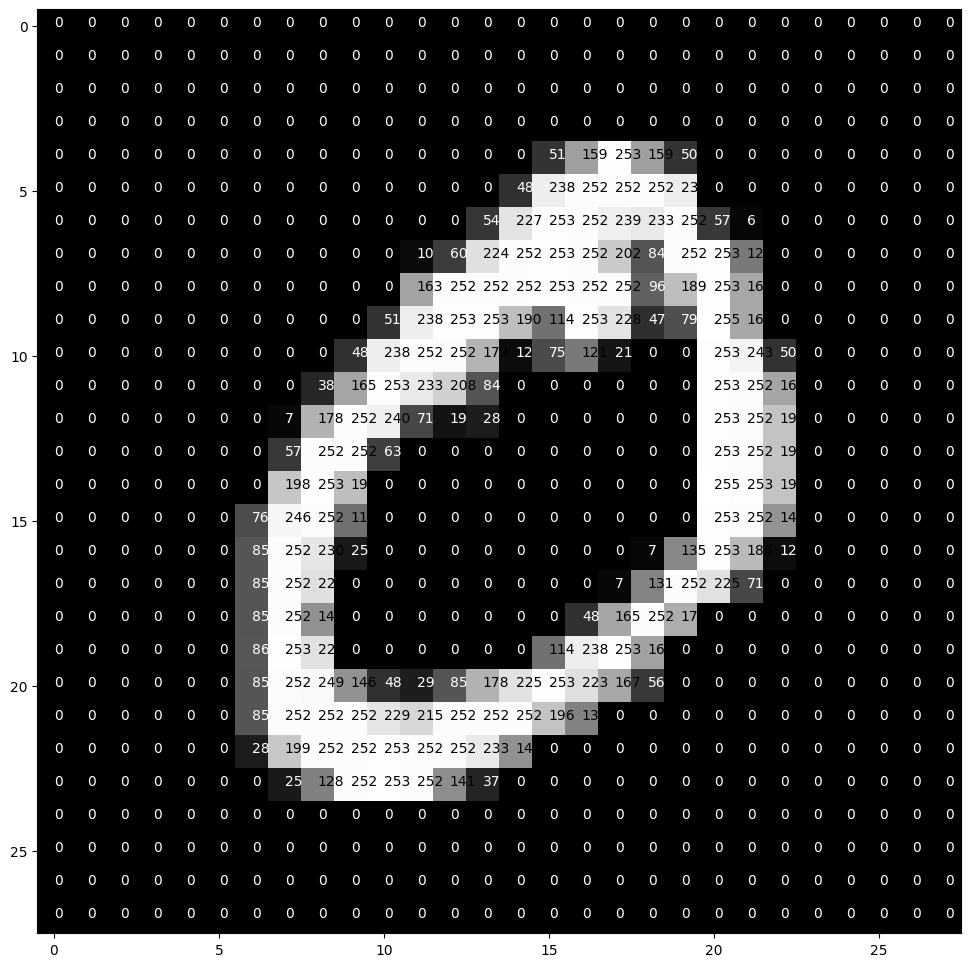

In [ ]:
pixel_visualize(x_train[1])

**Encoding**

Veri setini daha  işlenebilir ve taşınabilir bir formata dönüştüreceğiz.

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:5]
## Output --> 5,0,4,1,9 sırasıyla bu sayılar bulunuyormuş.

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Reshaping**

giriş verilerinin belirli bir şekilde boyutlandırılması gerekiyor. Reshaping uygun formata getirerek işlenebilir hale getiriyor.

In [ ]:
image_size = x_train.shape[1]

In [ ]:
image_size

28

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

 ## x_train.shape[0] kısmı 60.000
 ## 1 yazan kısım, piksellerde tutulan değerleri ifade ediyor.

**Standartlaştırma**

Veri özelliklerinin belirli bir aralığa veya dağılıma getirilmesi yapacağız.Modeli daha verimli bir şekilde eğitmek ve istenmeyen durumlardan kaçınmak için yapılır.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
## RGB değerleri 0-255 arasında olduğu için piksellerde tutulan verileri standartlaştırmak için hepsini 255'e böldük.Böylelikle tüm değerler 0-1 arasına gelmiş oldu

***MODELLEME***

In [ ]:
## Modelin temel iskeletinin oluşturulması.
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation='relu',name='layer1'),
    Dense(units=num_labels,activation='softmax',name='output_layer')])

## metriklerin ve fonksiyonların belirlenmesi
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])


## flatten --> reshape yaptığımız verileri sinir ağının anlayacağı şekilde çevirmemiz gerekiyor.
## softmax --> çoklu sınıflandırma problemlerinde softmax, ikili sınıflandırma sigmoid fonksiyonu kullanılır.


In [ ]:
## modelin özeti
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Model eğitim kısmı
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 0.3589 - precision: 0.9469 - recall: 0.8489 - accuracy: 0.9008 - val_loss: 0.1949 - val_precision: 0.9568 - val_recall: 0.9313 - val_accuracy: 0.9434
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1625 - precision: 0.9650 - recall: 0.9438 - accuracy: 0.9537 - val_loss: 0.1291 - val_precision: 0.9715 - val_recall: 0.9552 - val_accuracy: 0.9636
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1175 - precision: 0.9733 - recall: 0.9596 - accuracy: 0.9662 - val_loss: 0.1082 - val_precision: 0.9743 - val_recall: 0.9627 - val_accuracy: 0.9680
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0921 - precision: 0.9786 - recall: 0.9680 - accuracy: 0.9730 - val_loss: 0.0943 - val_precision: 0.9763 - val_recall: 0.9665 - val_accuracy: 0.9706
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0747 - precision: 0.9823 - r

***Evaluation***

In [ ]:
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0267 - precision: 0.9941 - recall: 0.9921 - accuracy: 0.9930 - val_loss: 0.0730 - val_precision: 0.9806 - val_recall: 0.9769 - val_accuracy: 0.9782
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0229 - precision: 0.9947 - recall: 0.9932 - accuracy: 0.9941 - val_loss: 0.0797 - val_precision: 0.9778 - val_recall: 0.9741 - val_accuracy: 0.9756
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0200 - precision: 0.9956 - recall: 0.9942 - accuracy: 0.9948 - val_loss: 0.0680 - val_precision: 0.9803 - val_recall: 0.9779 - val_accuracy: 0.9786
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0172 - precision: 0.9967 - recall: 0.9955 - accuracy: 0.9961 - val_loss: 0.0726 - val_precision: 0.9801 - val_recall: 0.9767 - val_accuracy: 0.9779
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0149 - precision: 0.9972 - 

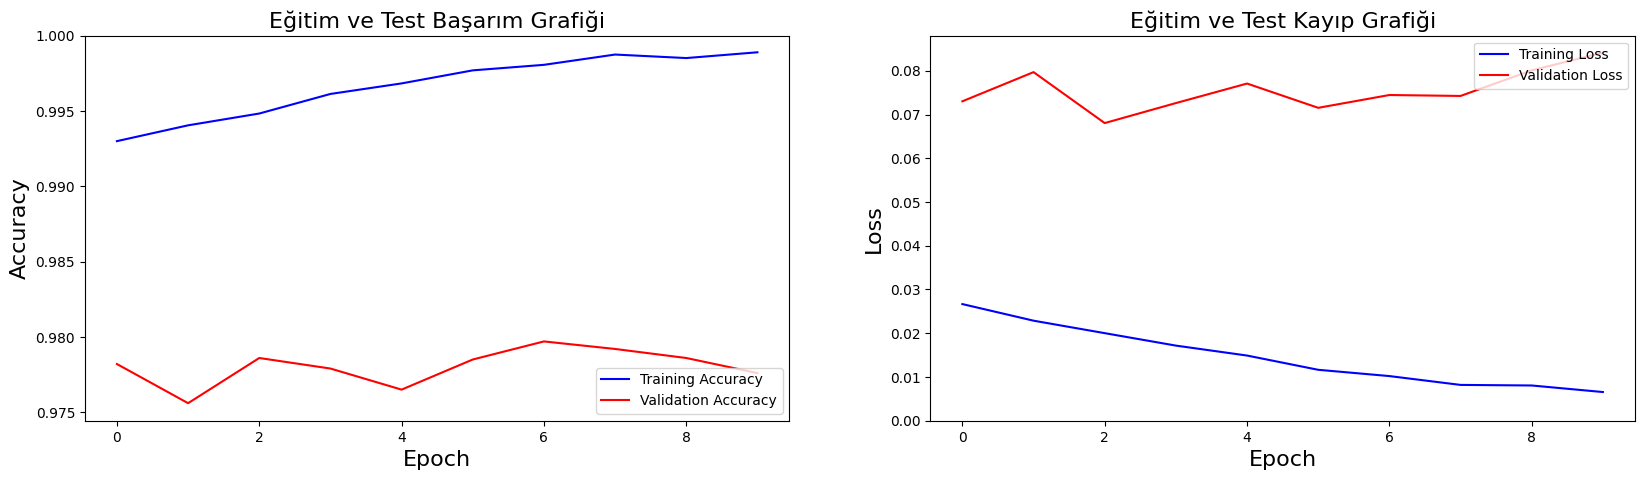

In [ ]:
##############################
#  Accuracy ve Loss Grafikleri
##############################

#--------------------Grafik 1 Accuracy ------------------

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği',fontsize=16)

#---------------------Grafik 2 Loss -----------------------

plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='b',label='Training Loss')
plt.plot(history.history['val_loss'],color='r',label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Eğitim ve Test Kayıp Grafiği',fontsize=16)
plt.show()

In [ ]:
## Değerlendirme sonuçları
loss, precision, recall, acc = model.evaluate(x_test,y_test,verbose=False)
print("\nTest Accuracy: %.lf%%" % (100.0 * acc))
print("\nTest Loss: %.lf%%" % (100.0 * loss))
print("\nTest Precision: %.lf%%" % (100.0 * precision))
print("\nTest Recall: %.lf%%" % (100.0 * recall))


Test Accuracy: 98%

Test Loss: 8%

Test Precision: 98%

Test Recall: 98%


***Tahmin***

In [ ]:
model.save('mnist_model.h5')
import random
random = random.randint(0,x_test.shape[0])

In [ ]:
random

2631

In [ ]:
test_image = x_test[random]

In [ ]:
## Veri setinde random belirlenen indexten veri seçtik. Bu veriyi model tahmin edecek.
y_test[random]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

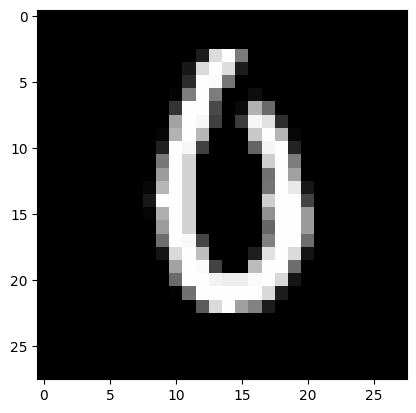

In [ ]:
## Seçtiğimiz random veri 0.
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [ ]:
test_data = x_test[random].reshape(1,28,28,1)

In [ ]:
## tahmin etme kısmı.Sonuç olarak sınıfların tahmin edilme olasılıkları verilecek.
probability = model.predict(test_data)

1/1 [==============================] - 0s 143ms/step


In [ ]:
probability

array([[8.7241381e-01, 1.0185934e-09, 1.6736728e-08, 1.2077325e-10,
        1.9227927e-07, 4.1301536e-07, 1.2758154e-01, 3.7570474e-06,
        1.5018689e-07, 3.9130047e-08]], dtype=float32)

In [ ]:
## en yüksek olasılığa sahip değeri buluyoruz.
predicted_classes = np.argmax(probability)

In [ ]:
## tahmin edilen sınıf
predicted_classes

0

In [ ]:
print(f"Tahmin edilen sınıf: {predicted_classes} \n")
print(f"Tahmin edilen sınıfın olasılık değeri: {(np.max(probability,axis=-1))[0]} \n")
print(f"Diğer sınıfların olasılık değerleri: {probability} \n")

Tahmin edilen sınıf: 0 

Tahmin edilen sınıfın olasılık değeri: 0.8724138140678406 

Diğer sınıfların olasılık değerleri: [[8.7241381e-01 1.0185934e-09 1.6736728e-08 1.2077325e-10 1.9227927e-07
  4.1301536e-07 1.2758154e-01 3.7570474e-06 1.5018689e-07 3.9130047e-08]] 

